In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
import struct

[[16.96994527  3.5066981 ]
 [16.0680372   4.04242605]
 [16.33933457  4.16193034]
 ...
 [ 0.46879712  0.19492843]
 [-0.32475942  1.06042832]
 [-0.74340513  1.02381311]]


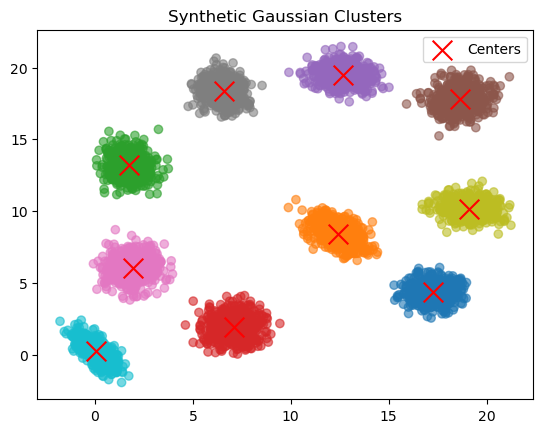

Les centres détéctés : [[17.27154702  4.33484364]
 [12.40669115  8.43252734]
 [ 1.71659278 13.23789901]
 [ 7.10088723  1.90873163]
 [12.67055357 19.44911638]
 [18.66011915 17.79305837]
 [ 1.92751929  6.0234614 ]
 [ 6.56466474 18.37098019]
 [19.0968234  10.15617515]
 [ 0.04524217  0.24763175]]


In [52]:
def generate_gaussian_clusters(n_clusters, n_samples_per_cluster):
    cluster_centers = []
    while len(cluster_centers) < n_clusters:
        candidate = np.random.uniform(0, 20, size=(2,))
        if all(np.linalg.norm(candidate - np.array(c)) >= 6 for c in cluster_centers):
            cluster_centers.append(candidate)
    
    cluster_centers = np.array(cluster_centers)
    data = []
    labels = []  # Ajout pour éviter l'erreur

    for i, center in enumerate(cluster_centers):
        variance_x = np.abs(np.random.normal(0.5, 0.15))  
        variance_y = np.abs(np.random.normal(0.5, 0.15))
        cov_value = np.random.exponential(scale=0.1) * np.random.choice([-1, 1])

        cov_matrix = np.array([[variance_x, cov_value], [cov_value, variance_y]])
        cov_matrix = (cov_matrix + cov_matrix.T) / 2  
        cov_matrix = cov_matrix + 1e-3 * np.eye(2)  

        if n_samples_per_cluster > 0:  # Éviter erreur si valeur est 0
            points = np.random.multivariate_normal(center, cov_matrix, n_samples_per_cluster)
            data.append(points)
            labels.extend([i] * n_samples_per_cluster)  # Assigner des labels aux points

    if len(data) > 0:
        data = np.vstack(data)
    else:
        data = np.array([])  # Retourne un tableau vide si aucune donnée générée

    return data, np.array(labels), cluster_centers

# Génération des données avec une valeur modifiable de `n_samples_per_cluster`
n_samples_per_cluster = 500
n_clusters = 10
data, labels, centers = generate_gaussian_clusters(n_clusters=n_clusters,n_samples_per_cluster=n_samples_per_cluster)

print(data)

# Vérification que des données existent avant l'affichage
if data.size > 0:
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], c='red', marker='x', s=200, label='Centers')
    plt.legend()
    plt.title("Synthetic Gaussian Clusters")
    plt.show()
else:
    print("Aucune donnée générée.")

print("Les centres détéctés :", centers)


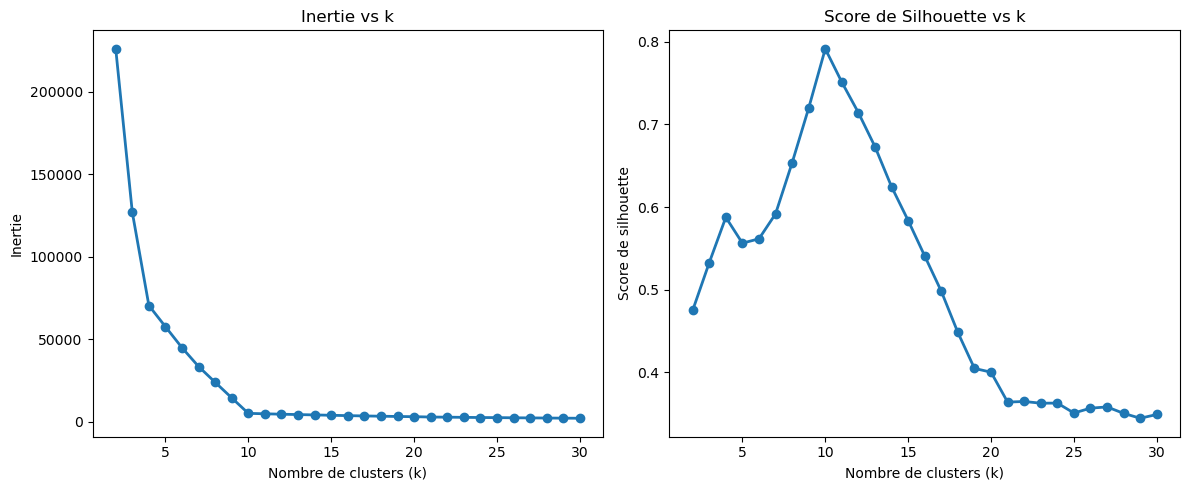

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# float_points : vos données reconstruites en float
data_arr = np.array(data)

ks = range(2, 31)
inertias    = []
silhouettes = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
    labels = kmeans.fit_predict(data_arr)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(data_arr, labels))

# Tracé côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inertie vs k
ax1.plot(ks, inertias, 'o-', linewidth=2)
ax1.set_title("Inertie vs k")
ax1.set_xlabel("Nombre de clusters (k)")
ax1.set_ylabel("Inertie")

# Silhouette vs k
ax2.plot(ks, silhouettes, 'o-', linewidth=2)
ax2.set_title("Score de Silhouette vs k")
ax2.set_xlabel("Nombre de clusters (k)")
ax2.set_ylabel("Score de silhouette")

plt.tight_layout()
plt.show()



Centres trouvés par K-Means :
[[ 7.09324656  1.93457636]
 [18.66505681 17.81504181]
 [ 6.55530276 18.36380029]
 [17.25686682  4.34000584]
 [ 1.70284736 13.17103931]
 [ 1.94517362  6.0751677 ]
 [12.44152345  8.40010824]
 [ 0.06964991  0.2169646 ]
 [19.09745953 10.17609377]
 [12.6655122  19.45033934]]

Inertie (somme des distances intra-cluster) : 5139.5855
Score de silhouette : 0.7914

Temps d'exécution de K-Means : 0.1595 secondes


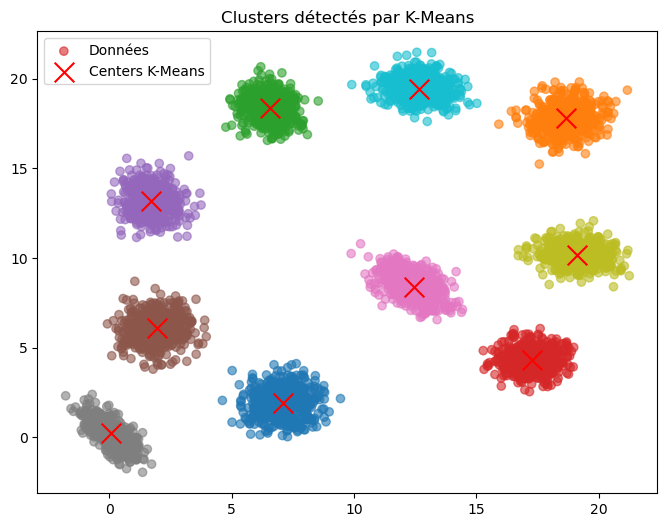

In [55]:
# Vérification qu'on a bien des données
if data.size > 0:
    # Mesurer le temps de calcul
    start_time = time.time()
    
    # Appliquer K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels_pred = kmeans.fit_predict(data)
    
    end_time = time.time()
    elapsed_time = end_time - start_time  # Temps en secondes

    # Affichage des coordonnées des centres trouvés par K-Means
    print("\nCentres trouvés par K-Means :")
    print(kmeans.cluster_centers_)

    # Calcul des performances de K-Means
    inertia = kmeans.inertia_  # Somme des distances intra-cluster
    print(f"\nInertie (somme des distances intra-cluster) : {inertia:.4f}")

    if n_clusters > 1:
        silhouette = silhouette_score(data, labels_pred)
        print(f"Score de silhouette : {silhouette:.4f}")

    print(f"\nTemps d'exécution de K-Means : {elapsed_time:.4f} secondes")

    # Visualisation des clusters détectés
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels_pred, cmap="tab10", alpha=0.6, label="Données")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Centers K-Means")
    plt.legend()
    plt.title("Clusters détectés par K-Means")
    plt.show()
else:
    print("Aucune donnée générée.")

In [56]:
# Fonction pour convertir un flottant en représentation IEEE 754 (64 bits)
def float_to_ieee754_bin64(f):
    """Convertit un float en binaire IEEE 754 (64 bits)."""
    [binary] = struct.unpack(">Q", struct.pack(">d", f))  # 'Q' = unsigned long long (64 bits)
    return np.array([int(bit) for bit in f"{binary:064b}"])

# Initialisation des matrices
X = []
Y = []

if data.size > 0:
    for point in data:
        x_bin = float_to_ieee754_bin64(point[0])
        y_bin = float_to_ieee754_bin64(point[1])
        
        X.append(x_bin)  # Ajout de la représentation binaire de X
        Y.append(y_bin)  # Ajout de la représentation binaire de y
        print(point,x_bin)

# Conversion en numpy array
X = np.array(X)
Y = np.array(Y)

# Affichage des résultats
print("Matrice X (représentation IEEE 754 des flottants) :")
print(X[:5])

print("\nMatrice Y (valeurs associées en binaire IEEE 754) :")
print(Y[:5])


[16.96994527  3.5066981 ] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1]
[16.0680372   4.04242605] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0
 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1]
[16.33933457  4.16193034] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1]
[17.41121547  4.09628894] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0]
[17.47691916  3.58789039] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0]
[17.48211184  4.95782855] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1]
[17.89770427  4.33972527] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1

[0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0]
[17.26814195  4.66411837] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1]
[16.89291374  3.3907101 ] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1]
[16.82236086  5.19711474] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1]
[18.38470561  4.32265   ] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]
[17.39892922  4.59095597] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1]
[17.33089947  4.06868904] [0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0

Avant fusion : 11 clusters
Après fusion : 10 clusters
Tailles : [500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
Centres finaux :
 [[ 7.09324656  1.93457636]
 [ 0.06964991  0.2169646 ]
 [ 1.94517362  6.0751677 ]
 [ 6.55530276 18.36380029]
 [ 1.70284736 13.17103931]
 [12.6655122  19.45033934]
 [18.66505681 17.81504181]
 [19.09745953 10.17609377]
 [17.25686682  4.34000584]
 [12.44152345  8.40010824]]

Temps d'exécution de X-Means : 0.1787 secondes
Clusters après fusion d’overlap : 10


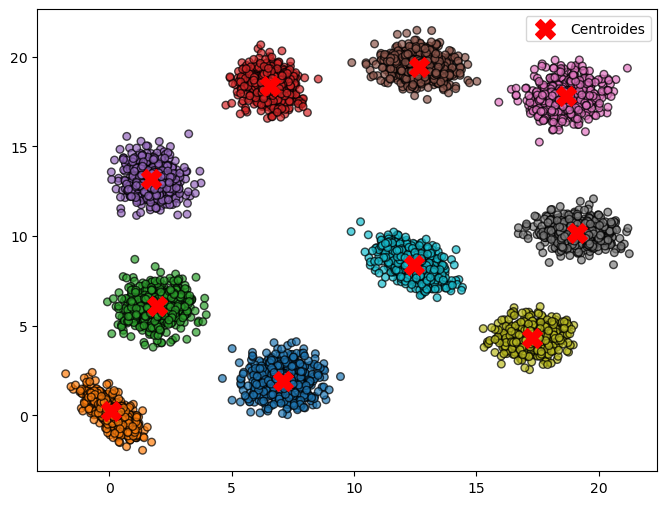

In [57]:
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from pyclustering.cluster.xmeans import xmeans

# --- 0) Préparation des données (float_points → X_arr) ---
X_arr = np.array(data)

# --- 1) Patch numpy.warnings pour pouvoir activer C‑Core ---
import numpy as _np
_np.warnings = warnings

start_time = time.time()
# --- 2) Initialisation aléatoire k_min centres ---
k_min = 2
initial_centers = X_arr[random.sample(range(len(X_arr)), k_min)].tolist()

# --- 3) Exécution de X‑Means (sans criterion, tolérance et C‑Core) ---
xm = xmeans(
    data            = X_arr.tolist(),
    initial_centers = initial_centers,
    kmax            = 50,
    tolerance       = 0.1,   # seuil de split
    ccore           = True   # moteur C‑Core plus robuste
)
xm.process()

# --- 4) Extraction des clusters initiaux et des centres ---
clusters = xm.get_clusters()
centers  = np.array(xm.get_centers())
print("Avant fusion :", len(clusters), "clusters")

# --- 5) Construction du vecteur de labels initial ---
labels = np.empty(len(X_arr), dtype=int)
for cid, pts in enumerate(clusters):
    labels[pts] = cid

# --- 6) Post‑fusion des petits clusters (<5% des points) ---
N = len(X_arr)
min_size = 0.05 * N
small_ids = [i for i, pts in enumerate(clusters) if len(pts) < min_size]

for sid in small_ids:
    dists = cdist([centers[sid]], centers)[0]
    dists[sid] = np.inf
    nearest = dists.argmin()
    labels[clusters[sid]] = nearest

# --- 7) Réindexation des labels pour qu’ils soient 0,1,2,… sans trous ---
unique = np.unique(labels)
label_map = {old: new for new, old in enumerate(unique)}
labels = np.array([label_map[l] for l in labels])

# --- 8) Reconstruction des clusters & centroïdes finaux ---
new_clusters = []
new_centers  = []

for k in range(len(unique)):
    idx = np.where(labels == k)[0]
    new_clusters.append(idx.tolist())
    new_centers.append(X_arr[idx].mean(axis=0))
new_centers = np.array(new_centers)

print("Après fusion :", len(new_clusters), "clusters")
print("Tailles :", [len(c) for c in new_clusters])
print("Centres finaux :\n", new_centers)

def merge_overlapping_clusters(X_arr, labels, centers, alpha=0.75):
    # reconstruit la liste de clusters
    def build_clusters(la):
        clusters = []
        for k in np.unique(la):
            clusters.append(np.where(la == k)[0].tolist())
        return clusters

    clusters = build_clusters(labels)

    # calcule les rayons
    def compute_radii(centers, clusters):
        radii = []
        for cid, pts in enumerate(clusters):
            pts_coords = X_arr[pts]
            radii.append(np.max(np.linalg.norm(pts_coords - centers[cid], axis=1)))
        return np.array(radii)

    labels_new = labels.copy()
    centers_new = centers.copy()
    changed = True

    while changed:
        changed = False
        clusters = build_clusters(labels_new)
        centers_new = np.array([X_arr[pts].mean(axis=0) for pts in clusters])
        radii = compute_radii(centers_new, clusters)

        # matrice distances entre centres
        D = cdist(centers_new, centers_new)
        np.fill_diagonal(D, np.inf)

        # trouve la paire la plus proche
        i, j = np.unravel_index(np.argmin(D), D.shape)
        if D[i, j] < alpha * (radii[i] + radii[j]):
            # fusionne j dans i
            labels_new[labels_new == j] = i
            # renumérote ensuite pour avoir des labels contigus
            unique = np.unique(labels_new)
            remap = {old: new for new, old in enumerate(unique)}
            labels_new = np.array([remap[l] for l in labels_new])
            changed = True

    # dernier calcul des centres
    clusters = build_clusters(labels_new)
    centers_new = np.array([X_arr[pts].mean(axis=0) for pts in clusters])

    return labels_new, centers_new

# --- Usage juste après votre X‑Means + post‑fusion initiale  ---
labels_merged, centers_merged = merge_overlapping_clusters(X_arr, labels, new_centers, alpha=0.8)

end_time = time.time()
elapsed_time = end_time - start_time  # Temps en secondes
print(f"\nTemps d'exécution de X-Means : {elapsed_time:.4f} secondes")

print("Clusters après fusion d’overlap :", len(np.unique(labels_merged)))

# Visualisation rapide
plt.figure(figsize=(8,6))
plt.scatter(X_arr[:,0], X_arr[:,1], c=labels_merged, cmap='tab10', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centers_merged[:,0], centers_merged[:,1], marker='X', c='red', s=200, label='Centroides')
plt.legend()
plt.show()


In [70]:
def generalized_deduplication_compress(X, Y, base_bits=12):
    """
    Compresses two binary matrices (X and Y) using Generalized Deduplication with base ID association.

    Args:
        X (np.ndarray): The input binary matrix for X coordinates.
        Y (np.ndarray): The input binary matrix for Y coordinates.
        base_bits (int): The number of bits to use as the base for each matrix.

    Returns:
        tuple: A tuple containing the base IDs, deviations, and the shape of the original matrices.
    """
    assert X.shape == Y.shape, "X and Y must have the same shape"
    
    original_shape = X.shape
    base_ids = []
    deviations = []
    base_dict = {}  # Dictionary to store base and their IDs
    next_base_id = 0

    for x_row, y_row in zip(X, Y):
        if len(x_row) >= base_bits and len(y_row) >= base_bits:
            # Create the base by concatenating the first `base_bits` of X and Y
            base = tuple(x_row[:base_bits]) + tuple(y_row[:base_bits])
            # Create the deviation by concatenating the remaining bits of X and Y
            deviation = np.concatenate((x_row[base_bits:], y_row[base_bits:]))

            if base in base_dict:
                base_id = base_dict[base]
            else:
                base_id = next_base_id
                base_dict[base] = base_id
                next_base_id += 1

            base_ids.append(base_id)
            deviations.append(deviation)
        else:
            # Handle cases where row length is less than base_bits
            base = tuple(x_row[:]) + tuple(y_row[:])
            deviation = np.array([])

            if base in base_dict:
                base_id = base_dict[base]
            else:
                base_id = next_base_id
                base_dict[base] = base_id
                next_base_id += 1

            base_ids.append(base_id)
            deviations.append(deviation)

    return base_ids, deviations, original_shape, base_dict

→ l_b optimal = 16 bits (η = 0.9432)


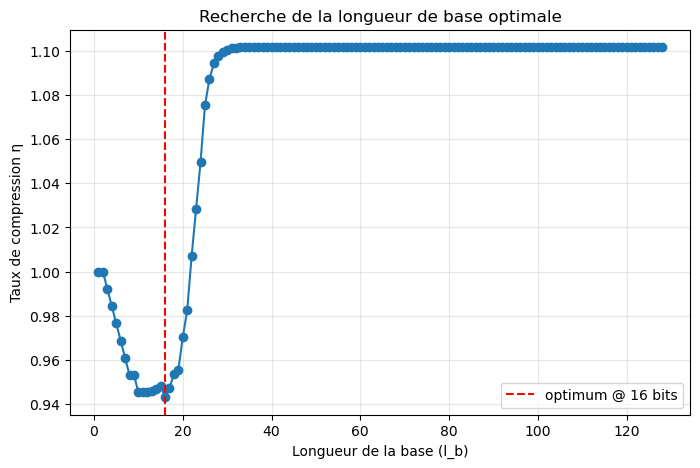

In [71]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Supposons que X et Y sont des tableaux de shape (n, 64) contenant des 0/1
n = X.shape[0]
l_s = 64 + 64            # bits par échantillon (X + Y)
c   = 1                  # pas de concaténation supplémentaire
l_c = c * l_s            # bits par chunk
n_c = n // c             # nombre de chunks

# 1) Construction des chunks (liste d'int Python)
chunks = []
for xb, yb in zip(X, Y):
    bitstr = ''.join(map(str, xb)) + ''.join(map(str, yb))
    chunks.append(int(bitstr, 2))
# on garde chunks comme list[int]

# 2) Boucle sur l_b de 1 à l_c
etas = []
l_b_values = range(1, l_c + 1)

for l_b in l_b_values:
    shift = l_c - l_b
    # extraire la base (les l_b bits de poids forts)
    bases_bis = [chunk >> shift for chunk in chunks]
    
    # nombre de bases uniques
    n_b = len(set(bases_bis))
    
    # longueur de l'ID de base
    l_id = math.ceil(math.log2(n_b)) if n_b > 1 else 1
    
    # longueur de la déviation
    l_d = l_c - l_b
    
    # taux de compression η
    numerator   = n_b * l_b + n_c * (l_id + l_d)
    denominator = n * l_s
    eta = numerator / denominator
    
    etas.append(eta)

# 3) On repère le minimum de η
best_idx = int(np.argmin(etas))
best_l_b = l_b_values[best_idx]
best_eta = etas[best_idx]
print(f"→ l_b optimal = {best_l_b} bits (η = {best_eta:.4f})")

# 4) Tracé de η vs l_b
plt.figure(figsize=(8, 5))
plt.plot(l_b_values, etas, marker='o')
plt.axvline(best_l_b, color='red', linestyle='--',
            label=f"optimum @ {best_l_b} bits")
plt.xlabel("Longueur de la base (l_b)")
plt.ylabel("Taux de compression η")
plt.title("Recherche de la longueur de base optimale")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [72]:
# Compress the matrices X and Y
base_bits = 12  # Number of bits for the base
base_ids, deviations, original_shape, base_dict = generalized_deduplication_compress(X, Y, base_bits=base_bits)

print("\nBase IDs:", base_ids)
print("Deviations:", deviations)
print("Original Shape:", original_shape)
print("Base Dictionary:", base_dict)


Base IDs: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 3, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1

[array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]), array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1,

In [73]:
def ieee754_bin64_to_float(bits):
    """
    Convertit une représentation binaire IEEE 754 (64 bits) en float (double précision).

    Args:
        bits (list): Une liste de 64 bits (0 ou 1).

    Returns:
        float: La valeur flottante correspondante.
    """
    if len(bits) != 64:
        raise ValueError("La liste doit contenir exactement 64 bits.")

    binary_str = ''.join(map(str, bits))
    integer_value = int(binary_str, 2)
    [float_value] = struct.unpack(">d", struct.pack(">Q", integer_value))
    return float_value

def compare_bitwise(a, b):
    """Compare deux tableaux de bits et retourne le plus petit et le plus grand bit à bit (poids fort à faible)."""
    for i in range(len(a)):
        if a[i] < b[i]:
            return a, b
        elif a[i] > b[i]:
            return b, a
    return a, b  # Si identiques

def compute_centroids(base_ids, deviations):
    unique_ids = np.unique(base_ids)
    centroids = {}
    weighted_centroids = {"max_deviation": {}, "mean_deviation": {}, "prod_deviation": {}}
    
    for uid in unique_ids:
        # Récupérer les indices correspondant à l'ID courant
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        # Extraire les valeurs
        selected_values = [deviations[i] for i in indices]
        # Trouver manuellement min et max en comparant bit par bit
        min_val = selected_values[0]
        max_val = selected_values[0]
        
        for val in selected_values:
            min_val, _ = compare_bitwise(min_val, val)
            _, max_val = compare_bitwise(max_val, val)
        
        print("Min:", min_val, "Max:", max_val)
        
         # Calculer la moyenne entre min et max (en entier)
        min_int = int(''.join(map(str, min_val)), 2)
        max_int = int(''.join(map(str, max_val)), 2)
        
        print("Min int:", min_int, "Max int:", max_int)
        mean_int = (min_int + max_int) // 2  # Moyenne des deux entiers
        
        # Convertir la moyenne en binaire
        mean_bin = bin(mean_int)[2:]  # On enlève le préfixe '0b'
        
        # Calculer le centroïde comme la moyenne entre min et max
        centroid = [int(bit) for bit in mean_bin.zfill(len(min_val))]  # Compléter avec des zéros si nécessaire
        
        centroids[uid] = centroid

        # Compute the maximum deviation (bitwise max - min for each dimension)
        max_deviations = []
        for i in range(len(min_val)):
            max_bit = 0
            min_bit = 1
            for val in selected_values:
                if val[i] > max_bit:
                    max_bit = val[i]
                if val[i] < min_bit:
                    min_bit = val[i]
            max_deviations.append(max_bit - min_bit)
        
        # Store the results for the maximum deviation
        print(f"Max Deviations for ID {uid}: {max_deviations}")
        
        # Calculate weighted centroids using different methods
        
        # (i) Maximum of the maximum deviations
        max_weighted_centroid = [centroid[i] * max_deviations[i] for i in range(len(centroid))]
        weighted_centroids["max_deviation"][uid] = max_weighted_centroid
        
        # (ii) Mean of the maximum deviations
        mean_deviation = np.mean(max_deviations)
        mean_weighted_centroid = [centroid[i] * mean_deviation for i in range(len(centroid))]
        weighted_centroids["mean_deviation"][uid] = mean_weighted_centroid
        
        # (iii) Product of the maximum deviations
        prod_deviation = np.prod(max_deviations)
        prod_weighted_centroid = [centroid[i] * prod_deviation for i in range(len(centroid))]
        weighted_centroids["prod_deviation"][uid] =  prod_weighted_centroid
    
    return centroids, weighted_centroids
    
centroids, weighted_centroids = compute_centroids(base_ids, deviations)
print("Centroids:", centroids)
print("Weighted Centroids:", weighted_centroids)

 

Min: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0
 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0] Max: [0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0]
Min int: 13239689928220574821172195896 Max int: 3748902183313182758849583298490
Max Deviations for ID 0: [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Min: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0

In [74]:
def reconstruct_points(base_dict, centroids, base_bits=12, centroid_bits=52):
    """
    Reconstructs the original points (X, Y) from the centroids and base dictionary.

    Args:
        base_dict (dict): Dictionary mapping bases to their IDs.
        centroids (dict): Dictionary mapping base IDs to their centroids.
        base_bits (int): Number of bits used for the base.
        centroid_bits (int): Number of bits in the centroid.

    Returns:
        list: A list of reconstructed points [(X1, Y1), (X2, Y2), ...].
    """
    reconstructed_points = []

    # Inverse the base_dict to map IDs back to bases
    id_to_base = {v: k for k, v in base_dict.items()}

    for base_id, centroid in centroids.items():
        # Retrieve the base corresponding to the base_id
        base = id_to_base[base_id]

        # Split the base into its X and Y components
        base_x = list(base[:base_bits])  # Convert tuple slice to list (X part of the base)
        base_y = list(base[base_bits:])  # Convert tuple slice to list (Y part of the base)

        # Split the centroid into its X and Y components
        centroid_x = centroid[:centroid_bits]  # First `centroid_bits` bits (X part of the centroid)
        centroid_y = centroid[centroid_bits:]  # Last `centroid_bits` bits (Y part of the centroid)

        # Reconstruct X coordinate
        x_bits = base_x + centroid_x  # Concatenate base X and centroid X

        # Reconstruct Y coordinate
        y_bits = base_y + centroid_y  # Concatenate base Y and centroid Y

        # Append the reconstructed point (X, Y)
        reconstructed_points.append((x_bits, y_bits))

    return reconstructed_points

# Reconstruction des points
reconstructed_points = reconstruct_points(base_dict, centroids)
print("Reconstructed Points:", reconstructed_points[0])
print("Taille", len(reconstructed_points))

Reconstructed Points: ([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])
Taille 160


Points reconstruits en flottants :
(17.483903321847542, 2.617834020783104)
(17.503513800986504, 6.773125378780126)
(13.477946764585141, 5.984833652640197)
(11.899195764900384, 3.855481806844078)
(12.023572453517655, 9.743985753629435)
(1.4982550018596061, 13.733084264624555)
(2.872489688213414, 9.290581289531454)
(0.7673548702261621, 8.848063960000019)
(0.37866741685926975, 11.948644419431771)
(0.20788666897401464, 14.234356318578305)
(0.08500166901019268, 13.362279455595004)
(6.497848502241742, 0.6703590530631984)
(6.672200821139231, 1.9757918593846207)
(6.3078656573808685, 2.211966668549214)
(7.189783741818801, 0.2532251100263697)
(8.507780253233342, 1.9773322769476551)
(8.47265320698905, 0.9296992031668939)
(7.182003009714843, 4.08076541725168)
(7.279055323999369, 0.03531083005840019)
(6.1213032959080635, 0.20921415609655125)
(7.0705470750900385, 0.10251420090219332)
(12.003340963844888, 17.171629797389684)
(18.79718620823262, 18.76939138131509)
(18.97827731188345, 13.57208126433712

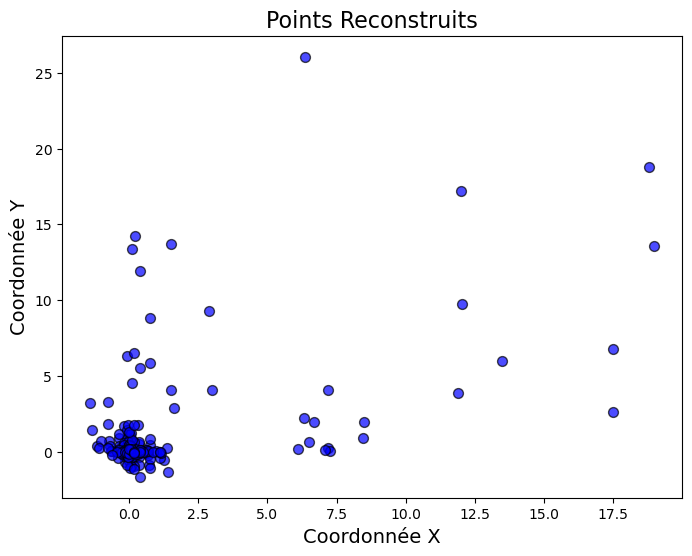

In [75]:

# Conversion des points reconstruits en flottants
def convert_reconstructed_points_to_float(reconstructed_points):
    """
    Convertit les points reconstruits (en bits IEEE 754) en coordonnées flottantes.

    Args:
        reconstructed_points (list): Liste des points sous forme de tuples de listes de bits [(X_bits, Y_bits), ...].

    Returns:
        list: Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
    """
    float_points = []
    for x_bits, y_bits in reconstructed_points:
        # Convertir les bits en flottants
        x_float = ieee754_bin64_to_float(x_bits)
        y_float = ieee754_bin64_to_float(y_bits)
        float_points.append((x_float, y_float))
    return float_points

# Conversion des points reconstruits en flottants
float_points = convert_reconstructed_points_to_float(reconstructed_points)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

# Affichage des points reconstruits
def plot_reconstructed_points(float_points):
    """
    Affiche les points reconstruits dans un graphique 2D.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
    """
    # Extraire les coordonnées X et Y
    x_coords, y_coords = zip(*float_points)

    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', s=50, alpha=0.7, edgecolor='k')
    plt.title("Points Reconstruits", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)

    # Afficher le graphique
    plt.show()

plot_reconstructed_points(float_points)

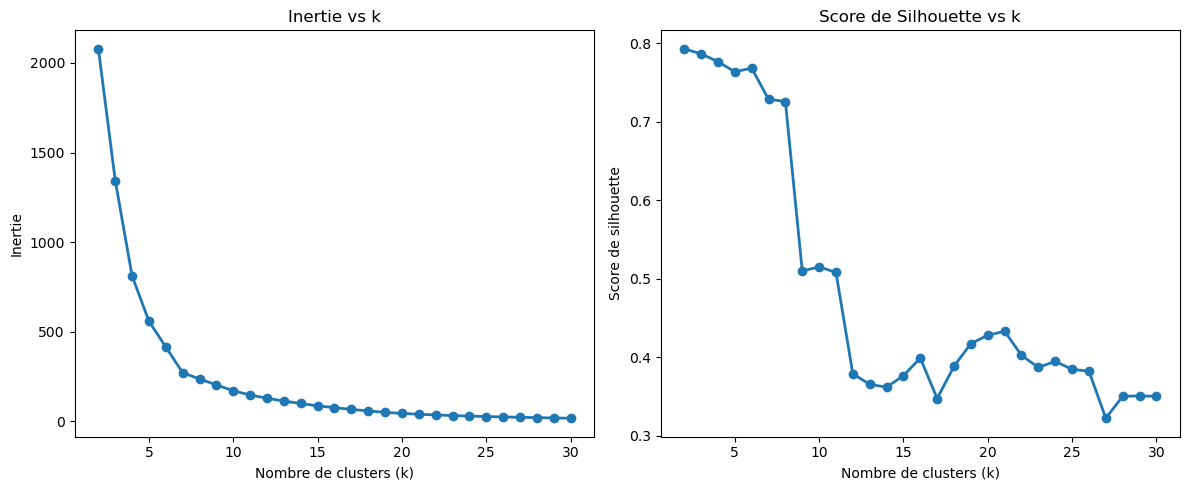

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# float_points : vos données reconstruites en float
data_arr = np.array(float_points)

ks = range(2, 31)
inertias    = []
silhouettes = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
    labels = kmeans.fit_predict(data_arr)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(data_arr, labels))

# Tracé côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inertie vs k
ax1.plot(ks, inertias, 'o-', linewidth=2)
ax1.set_title("Inertie vs k")
ax1.set_xlabel("Nombre de clusters (k)")
ax1.set_ylabel("Inertie")

# Silhouette vs k
ax2.plot(ks, silhouettes, 'o-', linewidth=2)
ax2.set_title("Score de Silhouette vs k")
ax2.set_xlabel("Nombre de clusters (k)")
ax2.set_ylabel("Score de silhouette")

plt.tight_layout()
plt.show()


# optimum à 9 clusters pour les 12 bits de base

/Users/fallou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centres trouvés par K-Means :
[[ 0.60275812  0.51367531]
 [15.27086707  9.81104538]
 [ 1.73977299 13.9251098 ]]

Inertie (somme des distances intra-cluster) : 1343.641908878135
Score de silhouette : 0.7864441457780211

Temps d'exécution de K-Means : 0.0811 secondes


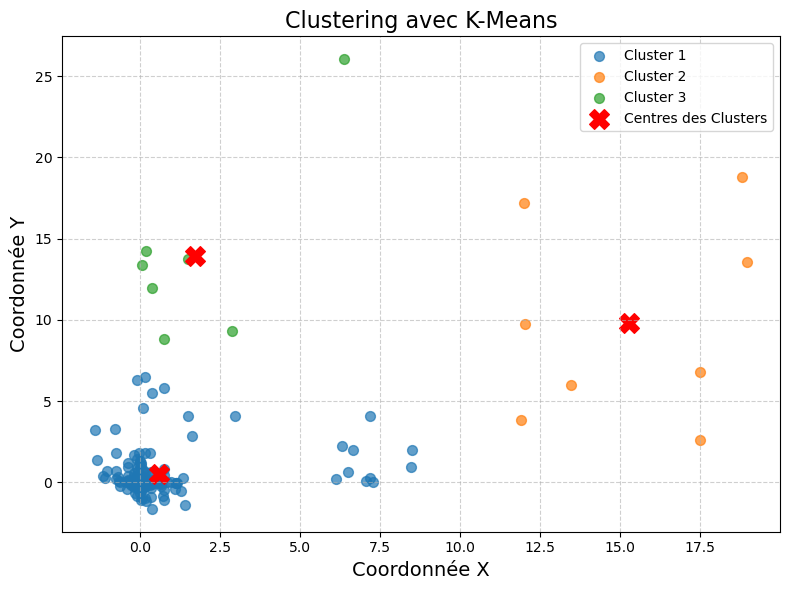

10


In [78]:
# Application de K-Means et visualisation
def apply_kmeans_and_plot(float_points, n_clusters):
    """
    Applique K-Means sur les points reconstruits et affiche les clusters ainsi que les métriques.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
        n_clusters (int): Nombre de clusters pour K-Means.
    """
    # Conversion en tableau NumPy
    points_array = np.array(float_points)

    # Mesurer le temps d'exécution
    start_time = time.time()

    # Initialisation et application de K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(points_array)

    # Mesurer le temps d'exécution
    end_time = time.time()
    execution_time = end_time - start_time

    # Centres des clusters
    cluster_centers = kmeans.cluster_centers_

    # Inertie (somme des distances intra-cluster)
    inertia = kmeans.inertia_

    # Score de silhouette (si plus de 1 cluster)
    if n_clusters > 1:
        silhouette = silhouette_score(points_array, labels)
    else:
        silhouette = None  # Le score de silhouette n'est pas défini pour un seul cluster

    # Afficher les résultats
    print("Centres trouvés par K-Means :")
    print(cluster_centers)
    print("\nInertie (somme des distances intra-cluster) :", inertia)
    if silhouette is not None:
        print("Score de silhouette :", silhouette)
    print(f"\nTemps d'exécution de K-Means : {execution_time:.4f} secondes")

    # Visualisation des clusters
    plt.figure(figsize=(8, 6))
    for cluster_id in range(n_clusters):
        # Sélectionner les points appartenant au cluster actuel
        cluster_points = points_array[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)

    # Afficher les centres des clusters
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label="Centres des Clusters")

    # Ajouter des détails au graphique
    plt.title("Clustering avec K-Means", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

apply_kmeans_and_plot(float_points, n_clusters = 3)
print(n_clusters)

Avant fusion : 5 clusters
Après fusion : 3 clusters
Tailles : [128, 15, 17]
Centres finaux :
 [[ 0.08049177  0.19654872]
 [ 1.99851276 10.10172695]
 [10.67439038  4.33899483]]

Temps d'exécution de X-Means : 0.0127 secondes
Clusters après fusion d’overlap : 1


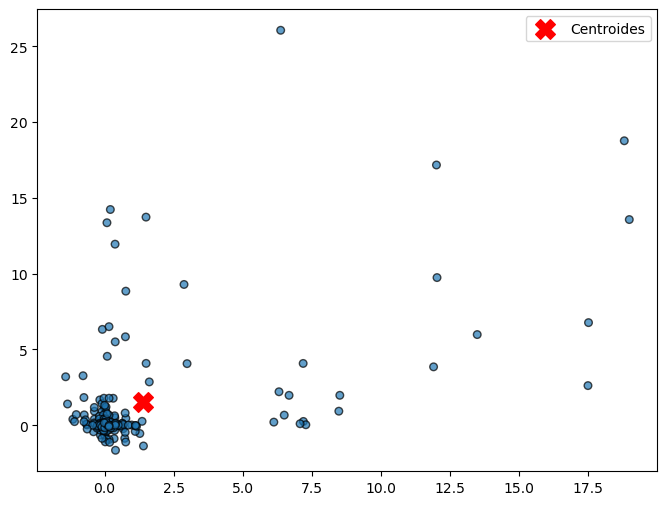

In [79]:
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from pyclustering.cluster.xmeans import xmeans

# --- 0) Préparation des données (float_points → X_arr) ---
X_arr = np.array(float_points)

# --- 1) Patch numpy.warnings pour pouvoir activer C‑Core ---
import numpy as _np
_np.warnings = warnings

start_time = time.time()
# --- 2) Initialisation aléatoire k_min centres ---
k_min = 2
initial_centers = X_arr[random.sample(range(len(X_arr)), k_min)].tolist()

# --- 3) Exécution de X‑Means (sans criterion, tolérance et C‑Core) ---
xm = xmeans(
    data            = X_arr.tolist(),
    initial_centers = initial_centers,
    kmax            = 50,
    tolerance       = 0.1,   # seuil de split
    ccore           = True   # moteur C‑Core plus robuste
)
xm.process()

# --- 4) Extraction des clusters initiaux et des centres ---
clusters = xm.get_clusters()
centers  = np.array(xm.get_centers())
print("Avant fusion :", len(clusters), "clusters")

# --- 5) Construction du vecteur de labels initial ---
labels = np.empty(len(X_arr), dtype=int)
for cid, pts in enumerate(clusters):
    labels[pts] = cid

# --- 6) Post‑fusion des petits clusters (<5% des points) ---
N = len(X_arr)
min_size = 0.05 * N
small_ids = [i for i, pts in enumerate(clusters) if len(pts) < min_size]

for sid in small_ids:
    dists = cdist([centers[sid]], centers)[0]
    dists[sid] = np.inf
    nearest = dists.argmin()
    labels[clusters[sid]] = nearest

# --- 7) Réindexation des labels pour qu’ils soient 0,1,2,… sans trous ---
unique = np.unique(labels)
label_map = {old: new for new, old in enumerate(unique)}
labels = np.array([label_map[l] for l in labels])

# --- 8) Reconstruction des clusters & centroïdes finaux ---
new_clusters = []
new_centers  = []

for k in range(len(unique)):
    idx = np.where(labels == k)[0]
    new_clusters.append(idx.tolist())
    new_centers.append(X_arr[idx].mean(axis=0))
new_centers = np.array(new_centers)

print("Après fusion :", len(new_clusters), "clusters")
print("Tailles :", [len(c) for c in new_clusters])
print("Centres finaux :\n", new_centers)

def merge_overlapping_clusters(X_arr, labels, centers, alpha=0.75):
    # reconstruit la liste de clusters
    def build_clusters(la):
        clusters = []
        for k in np.unique(la):
            clusters.append(np.where(la == k)[0].tolist())
        return clusters

    clusters = build_clusters(labels)

    # calcule les rayons
    def compute_radii(centers, clusters):
        radii = []
        for cid, pts in enumerate(clusters):
            pts_coords = X_arr[pts]
            radii.append(np.max(np.linalg.norm(pts_coords - centers[cid], axis=1)))
        return np.array(radii)

    labels_new = labels.copy()
    centers_new = centers.copy()
    changed = True

    while changed:
        changed = False
        clusters = build_clusters(labels_new)
        centers_new = np.array([X_arr[pts].mean(axis=0) for pts in clusters])
        radii = compute_radii(centers_new, clusters)

        # matrice distances entre centres
        D = cdist(centers_new, centers_new)
        np.fill_diagonal(D, np.inf)

        # trouve la paire la plus proche
        i, j = np.unravel_index(np.argmin(D), D.shape)
        if D[i, j] < alpha * (radii[i] + radii[j]):
            # fusionne j dans i
            labels_new[labels_new == j] = i
            # renumérote ensuite pour avoir des labels contigus
            unique = np.unique(labels_new)
            remap = {old: new for new, old in enumerate(unique)}
            labels_new = np.array([remap[l] for l in labels_new])
            changed = True

    # dernier calcul des centres
    clusters = build_clusters(labels_new)
    centers_new = np.array([X_arr[pts].mean(axis=0) for pts in clusters])

    return labels_new, centers_new

# --- Usage juste après votre X‑Means + post‑fusion initiale  ---
labels_merged, centers_merged = merge_overlapping_clusters(X_arr, labels, new_centers, alpha=0.8)

end_time = time.time()
elapsed_time = end_time - start_time  # Temps en secondes
print(f"\nTemps d'exécution de X-Means : {elapsed_time:.4f} secondes")

print("Clusters après fusion d’overlap :", len(np.unique(labels_merged)))

# Visualisation rapide
plt.figure(figsize=(8,6))
plt.scatter(X_arr[:,0], X_arr[:,1], c=labels_merged, cmap='tab10', s=30, alpha=0.7, edgecolor='k')
plt.scatter(centers_merged[:,0], centers_merged[:,1], marker='X', c='red', s=200, label='Centroides')
plt.legend()
plt.show()


In [23]:
def compute_centroids_with_weights(base_ids, deviations):
    """
    Calcule les centroïdes pour chaque base ID et associe un poids à chaque base.
    Le poids est défini comme le nombre de déviations associées à la base.

    Args:
        base_ids (list): Liste des IDs des bases.
        deviations (list): Liste des déviations associées.

    Returns:
        dict: Dictionnaire contenant les centroïdes pour chaque base ID.
        dict: Dictionnaire contenant les poids pour chaque base ID.
    """
    unique_ids = np.unique(base_ids)
    centroids = {}
    weights = {}

    for uid in unique_ids:
        # Récupérer les indices correspondant à l'ID courant
        indices = [i for i, x in enumerate(base_ids) if x == uid]
        # Extraire les déviations associées
        selected_values = [deviations[i] for i in indices]

        # Trouver manuellement min et max en comparant bit par bit
        min_val = selected_values[0]
        max_val = selected_values[0]

        for val in selected_values:
            min_val, _ = compare_bitwise(min_val, val)
            _, max_val = compare_bitwise(max_val, val)

        # Calculer la moyenne entre min et max (en entier)
        min_int = int(''.join(map(str, min_val)), 2)
        max_int = int(''.join(map(str, max_val)), 2)
        mean_int = (min_int + max_int) // 2  # Moyenne des deux entiers

        # Convertir la moyenne en binaire
        mean_bin = bin(mean_int)[2:]  # On enlève le préfixe '0b'

        # Calculer le centroïde comme la moyenne entre min et max
        centroid = [int(bit) for bit in mean_bin.zfill(len(min_val))]  # Compléter avec des zéros si nécessaire
        centroids[uid] = centroid

        # Associer un poids à la base (nombre de déviations associées)
        weights[uid] = len(selected_values)

    return centroids, weights

# Exemple d'utilisation
centroids_with_weights, weights = compute_centroids_with_weights(base_ids, deviations)
print("Centroids with Weights:", centroids_with_weights)
print("Weights:", weights)

Centroids with Weights: {0: [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], 1: [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], 2: [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], 3: [0, 1, 1, 0, 0, 0, 0,

In [24]:
# Reconstruction des points
reconstructed_points_bis = reconstruct_points(base_dict, centroids_with_weights)
print("Reconstructed Points:", reconstructed_points_bis[0])
print("Taille", len(reconstructed_points_bis))

Reconstructed Points: ([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1])
Taille 54


In [25]:
# Conversion des points reconstruits en flottants
float_points_bis = convert_reconstructed_points_to_float(reconstructed_points)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

# Conversion des points reconstruits en flottants
float_points = convert_reconstructed_points_to_float(reconstructed_points_bis)

# Affichage des résultats
print("Points reconstruits en flottants :")
for point in float_points:
    print(point)

Points reconstruits en flottants :
(9.427149154601997, 7.970871951411611)
(7.687686830251319, 6.4698437112744935)
(12.094824160376872, 2.1300413253358577)
(5.530995368436389, 14.034705256760665)
(19.35922757412813, 13.989042056400844)
(1.322119671620765, 1.3275943415699636)
(-0.3770333399639525, 1.8348679228146876)
(-0.06010682250068014, 2.3372823430126957)
(-0.6976116643400391, 2.3804978914057133)
(0.4011373507474587, 1.1653051129512668)
(0.7188156347131224, 1.226257134648001)
(0.03447267854023444, 1.2751228251236395)
(-0.705165775002934, 1.4036332240729077)
(-0.37524513773647145, 2.5255449412988553)
(0.09607805740870481, 1.6917149930887871)
(-1.2169060916021044, 3.6101790452946534)
(-0.18637263255091815, 2.4827296704875264)
(0.19841115263496478, 1.1633900529535426)
(0.1668259666461251, 3.3219569671304745)
(-0.04090718596943066, 1.6378011423543968)
(-1.3642584357553147, 1.0875265104467213)
(-0.18601939098376774, 1.34004202783237)
(0.10537368708124215, 2.596911333071248)
(0.39036585240

/Users/fallou/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centres trouvés par K-Means :
[[19.35922757 13.98904206]
 [-0.06726554  1.8196981 ]
 [ 9.35068927  7.90489269]
 [15.9427926   1.41830399]
 [ 5.53099537 14.03470526]
 [10.61082621 17.77445376]
 [11.15958374 11.06890652]]

Inertie (somme des distances intra-cluster) : 425.9547763063266
Score de silhouette : 0.7758922243900286

Temps d'exécution de K-Means : 0.2339 secondes


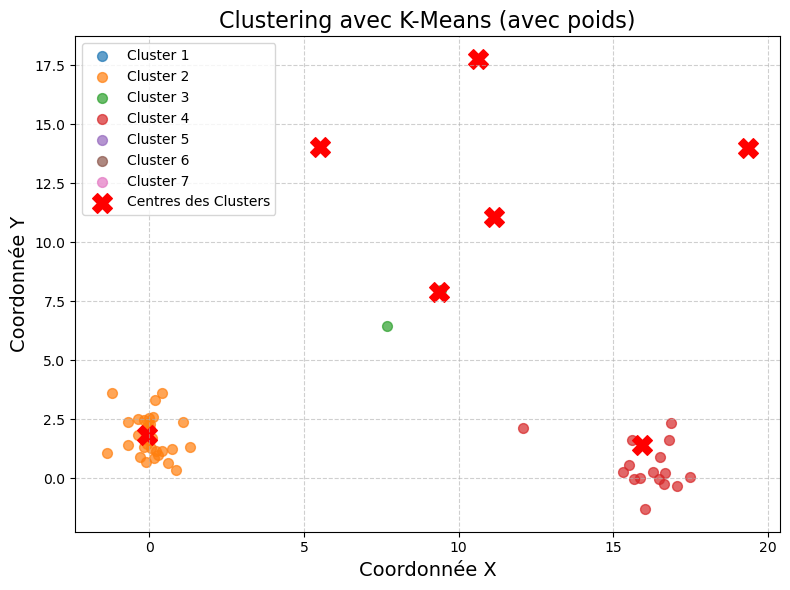

In [26]:
def apply_kmeans_with_weights_and_plot(float_points, weights, n_clusters):
    """
    Applique K-Means sur les points reconstruits en tenant compte des poids et affiche les clusters ainsi que les métriques.

    Args:
        float_points (list): Liste des points sous forme de tuples de flottants [(X1, Y1), (X2, Y2), ...].
        weights (dict): Dictionnaire contenant les poids associés à chaque base ID.
        n_clusters (int): Nombre de clusters pour K-Means.
    """
    # Conversion en tableau NumPy
    points_array = np.array(float_points)

    # Création d'un tableau de poids aligné avec les points
    weight_array = np.array([weights[base_id] for base_id in range(len(float_points))])

    # Mesurer le temps d'exécution
    start_time = time.time()

    # Initialisation et application de K-Means avec les poids
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(points_array, sample_weight=weight_array)

    # Mesurer le temps d'exécution
    end_time = time.time()
    execution_time = end_time - start_time

    # Centres des clusters
    cluster_centers = kmeans.cluster_centers_

    # Inertie (somme des distances intra-cluster)
    inertia = kmeans.inertia_

    # Score de silhouette (sans poids, car non supporté)
    if n_clusters > 1:
        silhouette = silhouette_score(points_array, labels)
    else:
        silhouette = None  # Le score de silhouette n'est pas défini pour un seul cluster

    # Afficher les résultats
    print("Centres trouvés par K-Means :")
    print(cluster_centers)
    print("\nInertie (somme des distances intra-cluster) :", inertia)
    if silhouette is not None:
        print("Score de silhouette :", silhouette)
    print(f"\nTemps d'exécution de K-Means : {execution_time:.4f} secondes")

    # Visualisation des clusters
    plt.figure(figsize=(8, 6))
    for cluster_id in range(n_clusters):
        # Sélectionner les points appartenant au cluster actuel
        cluster_points = points_array[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}", s=50, alpha=0.7)

    # Afficher les centres des clusters
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label="Centres des Clusters")

    # Ajouter des détails au graphique
    plt.title("Clustering avec K-Means (avec poids)", fontsize=16)
    plt.xlabel("Coordonnée X", fontsize=14)
    plt.ylabel("Coordonnée Y", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

apply_kmeans_with_weights_and_plot(float_points, weights, n_clusters=n_clusters)